In [7]:
#Upload file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving face_detection.jpg to face_detection.jpg
User uploaded file "face_detection.jpg" with length 52491 bytes


In [0]:
# CMD install mtcnn
!pip3 install mtcnn

    100% |████████████████████████████████| 2.3MB 9.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/be/dd/12/bccde6b95f576af24256f6f1a2e4087eb8488405a6c107e13c
Successfully built mtcnn


In [8]:
# Face detection and drawing
import cv2
from mtcnn.mtcnn import MTCNN

detector = MTCNN()

image = cv2.imread("face_detection.jpg")
result = detector.detect_faces(image)

# Result is an array with all the bounding boxes detected. We know that for 'ivan.jpg' there is only one.
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

cv2.rectangle(image,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              2)

cv2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)

cv2.imwrite("lnd_drawn.jpg", image)

print(result)

[{'box': [106, 66, 151, 201], 'confidence': 0.9949709177017212, 'keypoints': {'left_eye': (146, 139), 'right_eye': (211, 159), 'nose': (155, 187), 'mouth_left': (131, 215), 'mouth_right': (183, 232)}}]


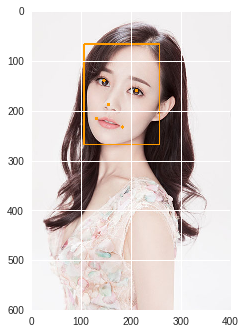

In [9]:
# show drawed image
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()